In [ ]:
import tensorflow as tf
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras

In [ ]:
# Setting the directories for training and testing data
train_dir=r"C:\Users\ASUS\Diabetic Retinopathy 2\model\training"
test_dir=r"C:\Users\ASUS\Diabetic Retinopathy 2\model\testing"


In [ ]:
# Defining batch size, number of epochs, and image dimensions
batch_size = 10
epochs = 1
img_height = 224
img_width = 224

In [ ]:
train_image_generator = ImageDataGenerator(rescale=1./255)
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,directory=train_dir,shuffle=True,target_size=(img_height, img_width),class_mode='categorical')

Found 4759 images belonging to 5 classes.


In [ ]:
val_image_generator = ImageDataGenerator(rescale=1./255)
val_data_gen = val_image_generator .flow_from_directory(batch_size=batch_size,directory=test_dir,shuffle=True,target_size=(img_height, img_width),class_mode='categorical')

Found 1111 images belonging to 5 classes.


In [ ]:
# Importing the InceptionV3 model with pre-trained weights on ImageNet

from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input

In [ ]:
# Creating the base model with InceptionV3 architecture
base_model = InceptionV3(weights = 'imagenet', include_top=False, input_shape=(img_width, img_height, 3))

In [ ]:
base_model.trainable = False

In [ ]:
base_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d_188 (Conv2D)         (None, 111, 111, 32)         864       ['input_3[0][0]']             
                                                                                                  
 batch_normalization_188 (B  (None, 111, 111, 32)         96        ['conv2d_188[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_188 (Activation  (None, 111, 111, 32)         0         ['batch_normalizati

                                                                                                  
 conv2d_199 (Conv2D)         (None, 25, 25, 32)           6144      ['average_pooling2d_18[0][0]']
                                                                                                  
 batch_normalization_193 (B  (None, 25, 25, 64)           192       ['conv2d_193[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 batch_normalization_195 (B  (None, 25, 25, 64)           192       ['conv2d_195[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 batch_normalization_198 (B  (None, 25, 25, 96)           288       ['conv2d_198[0][0]']          
 atchNorma

 )                                                                  ]']                           
                                                                                                  
 activation_205 (Activation  (None, 25, 25, 96)           0         ['batch_normalization_205[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_206 (Activation  (None, 25, 25, 64)           0         ['batch_normalization_206[0][0
 )                                                                  ]']                           
                                                                                                  
 mixed1 (Concatenate)        (None, 25, 25, 288)          0         ['activation_200[0][0]',      
                                                                     'activation_202[0][0]',      
          

 )                                                                  ]']                           
                                                                                                  
 conv2d_216 (Conv2D)         (None, 25, 25, 96)           55296     ['activation_215[0][0]']      
                                                                                                  
 batch_normalization_216 (B  (None, 25, 25, 96)           288       ['conv2d_216[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_216 (Activation  (None, 25, 25, 96)           0         ['batch_normalization_216[0][0
 )                                                                  ]']                           
                                                                                                  
 conv2d_21

                                                                                                  
 conv2d_218 (Conv2D)         (None, 12, 12, 192)          147456    ['mixed3[0][0]']              
                                                                                                  
 conv2d_221 (Conv2D)         (None, 12, 12, 192)          172032    ['activation_220[0][0]']      
                                                                                                  
 conv2d_226 (Conv2D)         (None, 12, 12, 192)          172032    ['activation_225[0][0]']      
                                                                                                  
 conv2d_227 (Conv2D)         (None, 12, 12, 192)          147456    ['average_pooling2d_21[0][0]']
                                                                                                  
 batch_normalization_218 (B  (None, 12, 12, 192)          576       ['conv2d_218[0][0]']          
 atchNorma

 activation_235 (Activation  (None, 12, 12, 160)          0         ['batch_normalization_235[0][0
 )                                                                  ]']                           
                                                                                                  
 average_pooling2d_22 (Aver  (None, 12, 12, 768)          0         ['mixed4[0][0]']              
 agePooling2D)                                                                                    
                                                                                                  
 conv2d_228 (Conv2D)         (None, 12, 12, 192)          147456    ['mixed4[0][0]']              
                                                                                                  
 conv2d_231 (Conv2D)         (None, 12, 12, 192)          215040    ['activation_230[0][0]']      
                                                                                                  
 conv2d_23

 atchNormalization)                                                                               
                                                                                                  
 activation_240 (Activation  (None, 12, 12, 160)          0         ['batch_normalization_240[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_245 (Activation  (None, 12, 12, 160)          0         ['batch_normalization_245[0][0
 )                                                                  ]']                           
                                                                                                  
 average_pooling2d_23 (Aver  (None, 12, 12, 768)          0         ['mixed5[0][0]']              
 agePooling2D)                                                                                    
          

                                                                                                  
 batch_normalization_250 (B  (None, 12, 12, 192)          576       ['conv2d_250[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 batch_normalization_255 (B  (None, 12, 12, 192)          576       ['conv2d_255[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_250 (Activation  (None, 12, 12, 192)          0         ['batch_normalization_250[0][0
 )                                                                  ]']                           
                                                                                                  
 activatio

 )                                                                  ]']                           
                                                                                                  
 conv2d_259 (Conv2D)         (None, 5, 5, 320)            552960    ['activation_258[0][0]']      
                                                                                                  
 conv2d_263 (Conv2D)         (None, 5, 5, 192)            331776    ['activation_262[0][0]']      
                                                                                                  
 batch_normalization_259 (B  (None, 5, 5, 320)            960       ['conv2d_259[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 batch_normalization_263 (B  (None, 5, 5, 192)            576       ['conv2d_263[0][0]']          
 atchNorma

 )                                                                  ]']                           
                                                                                                  
 activation_270 (Activation  (None, 5, 5, 384)            0         ['batch_normalization_270[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_271 (Activation  (None, 5, 5, 384)            0         ['batch_normalization_271[0][0
 )                                                                  ]']                           
                                                                                                  
 batch_normalization_272 (B  (None, 5, 5, 192)            576       ['conv2d_272[0][0]']          
 atchNormalization)                                                                               
          

 )                                                                  ]']                           
                                                                                                  
 activation_276 (Activation  (None, 5, 5, 384)            0         ['batch_normalization_276[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_279 (Activation  (None, 5, 5, 384)            0         ['batch_normalization_279[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_280 (Activation  (None, 5, 5, 384)            0         ['batch_normalization_280[0][0
 )                                                                  ]']                           
          

In [ ]:
cnn_model = keras.models.Sequential([
    base_model,
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(5, activation="softmax")
])

In [ ]:
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])






In [ ]:
history = cnn_model.fit(train_data_gen, epochs=72,
validation_data= val_data_gen,)


Epoch 1/72
476/476 [==============================] - 180s 378ms/step - loss: 0.8565 - accuracy: 0.6602 - val_loss: 1.3153 - val_accuracy: 0.4122
Epoch 2/72
476/476 [==============================] - 174s 365ms/step - loss: 0.8003 - accuracy: 0.6798 - val_loss: 1.2784 - val_accuracy: 0.4383
Epoch 3/72
476/476 [==============================] - 176s 369ms/step - loss: 0.7801 - accuracy: 0.6905 - val_loss: 1.2143 - val_accuracy: 0.4842
Epoch 4/72
476/476 [==============================] - 174s 366ms/step - loss: 0.7379 - accuracy: 0.7054 - val_loss: 1.1756 - val_accuracy: 0.5005
Epoch 5/72
476/476 [==============================] - 174s 365ms/step - loss: 0.7196 - accuracy: 0.7107 - val_loss: 1.2805 - val_accuracy: 0.4491
Epoch 6/72
476/476 [==============================] - 176s 371ms/step - loss: 0.6984 - accuracy: 0.7247 - val_loss: 1.2165 - val_accuracy: 0.4554
Epoch 7/72
476/476 [==============================] - 175s 367ms/step - loss: 0.6719 - accuracy: 0.7331 - val_loss: 1.0659 -

Epoch 57/72
476/476 [==============================] - 168s 353ms/step - loss: 0.0906 - accuracy: 0.9683 - val_loss: 0.1785 - val_accuracy: 0.9415
Epoch 58/72
476/476 [==============================] - 168s 353ms/step - loss: 0.1109 - accuracy: 0.9639 - val_loss: 0.2498 - val_accuracy: 0.8965
Epoch 59/72
476/476 [==============================] - 168s 354ms/step - loss: 0.0953 - accuracy: 0.9702 - val_loss: 0.0712 - val_accuracy: 0.9865
Epoch 60/72
476/476 [==============================] - 168s 353ms/step - loss: 0.0890 - accuracy: 0.9685 - val_loss: 0.1817 - val_accuracy: 0.9280
Epoch 61/72
476/476 [==============================] - 168s 353ms/step - loss: 0.1022 - accuracy: 0.9647 - val_loss: 0.3414 - val_accuracy: 0.8650
Epoch 62/72
476/476 [==============================] - 168s 354ms/step - loss: 0.1075 - accuracy: 0.9634 - val_loss: 0.0605 - val_accuracy: 0.9928
Epoch 63/72
476/476 [==============================] - 169s 355ms/step - loss: 0.0637 - accuracy: 0.9784 - val_loss: 0

In [ ]:
cnn_model.save(r"C:\Users\ASUS\Diabetic Retinopathy Detection\model\eye1.h5")


In [ ]:
import numpy as np

In [ ]:
y=np.concatenate([val_data_gen.next()[1] for i in range(val_data_gen.__len__())])
true_labels=np.argmax(y, axis=-1)
prediction= cnn_model.predict(val_data_gen, verbose=2)
prediction=np.argmax(prediction, axis=-1)

112/112 - 18s - 18s/epoch - 163ms/step


In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
cm = confusion_matrix(y_true=true_labels, y_pred=prediction)

In [ ]:
cm_plot_labels = ['No_DR','Mild','Moderate','Severe','Proliferate_DR']

Confusion matrix, without normalization
[[286   0   0   0   0]
 [  9 269   8   0   0]
 [  0   0 297   0   0]
 [  0   0   6 136   1]
 [  0   0   0   0  99]]
Accuracy: 0.978
Precision: 0.976
Recall: 0.978
F-Measure: 0.978


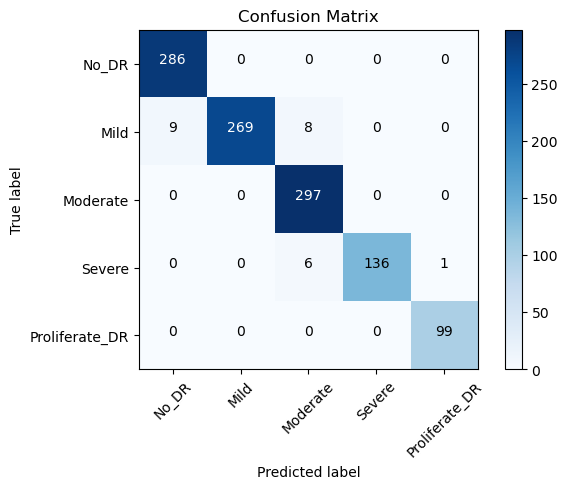

In [ ]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')
from sklearn.metrics import accuracy_score
acc=accuracy_score(true_labels,prediction)
print('Accuracy: %.3f' % acc)
from sklearn.metrics import precision_score
precision = precision_score(true_labels,prediction,labels=[1,2], average='micro')
print('Precision: %.3f' % precision)
from sklearn.metrics import recall_score
recall = recall_score(true_labels,prediction, average='micro')
print('Recall: %.3f' % recall)
from sklearn.metrics import f1_score
score = f1_score(true_labels,prediction, average='micro')
print('F-Measure: %.3f' % score)

112/112 [==============================] - 19s 169ms/step


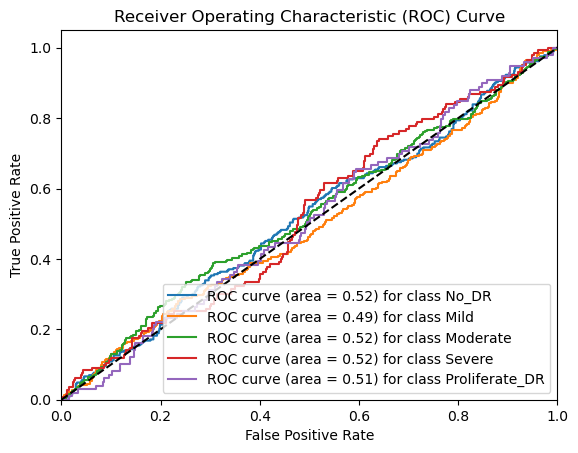

In [ ]:
# Calculate predicted probabilities
predicted_probabilities = cnn_model.predict(val_data_gen)

# Computing ROC curve for each class
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(cm_plot_labels)):
    fpr[i], tpr[i], _ = roc_curve(y[:, i], predicted_probabilities[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Ploting ROC curve
plt.figure()
for i in range(len(cm_plot_labels)):
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for class %s' % (roc_auc[i], cm_plot_labels[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()